### Import basic modules

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [3]:
# df = pd.read_csv('data/Dataset.csv')

### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [4]:
# import modules.cleansing as cl

# df = cl.remove_columns(df, ['PATIENT_TYPE'])
# df = cl.remove_invalid_values(df)
# df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
# df_original = df.copy()
# # df = cl.remove_outliers(df, 'AGE')
# df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [5]:
# df.to_csv('data/Dataset_revised_new.csv', index=False)
# df_original.to_csv('data/Dataset_revised_org.csv', index=False)
# df.describe()

### II/ Descriptive Statistics and Data Visualisation: 
 


In [6]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_583592/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')
/tmp/ipykernel_583592/2795104614.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset_revised_new.csv')


In [7]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df_main = df[new_column_list].copy()
analytics_df_main

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
200027,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200028,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200029,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


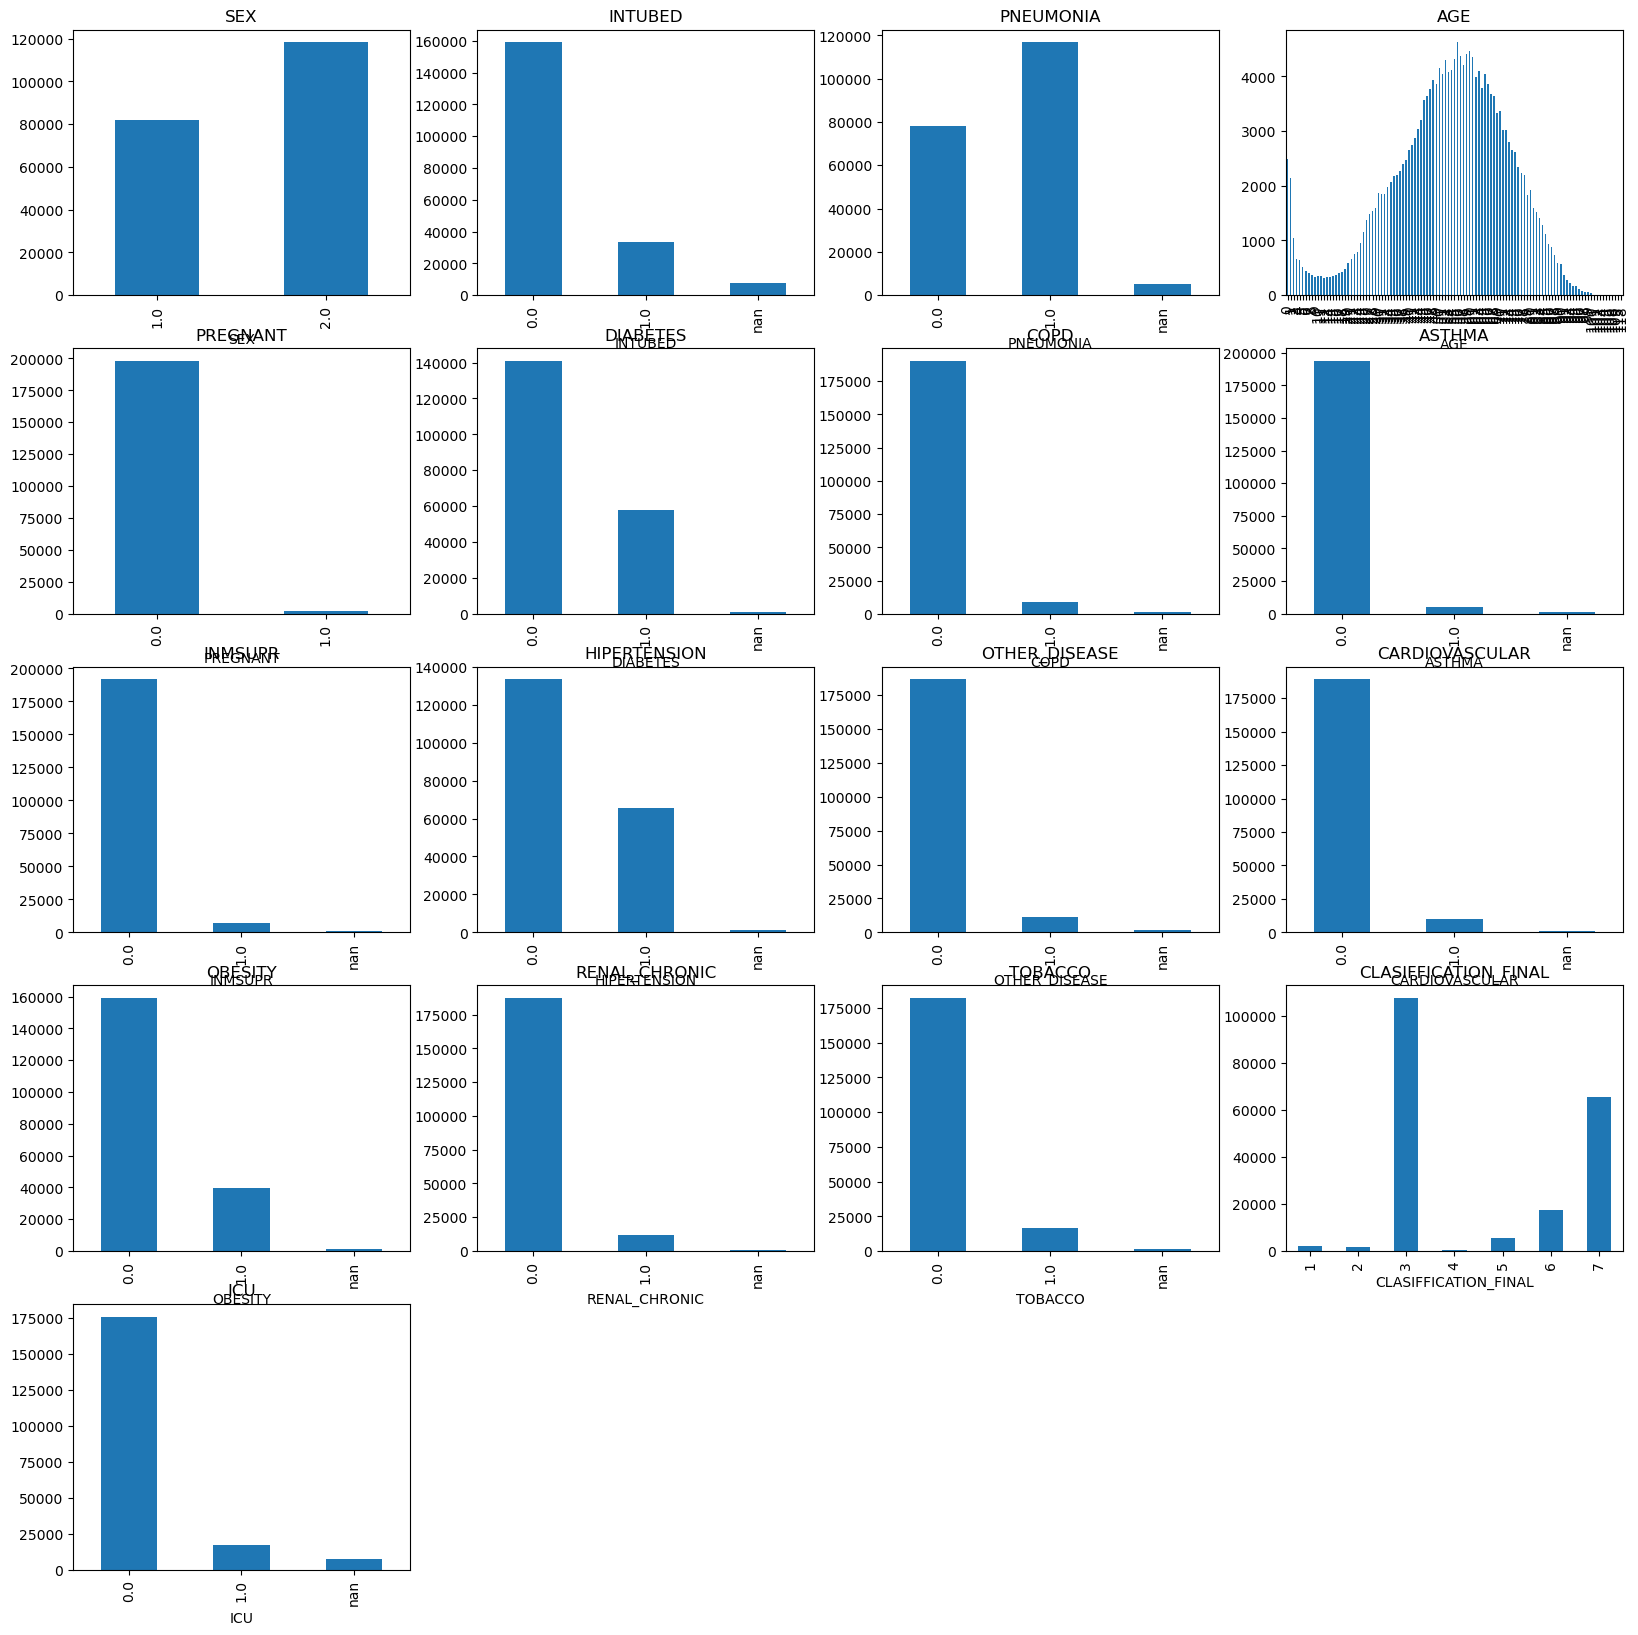

In [8]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

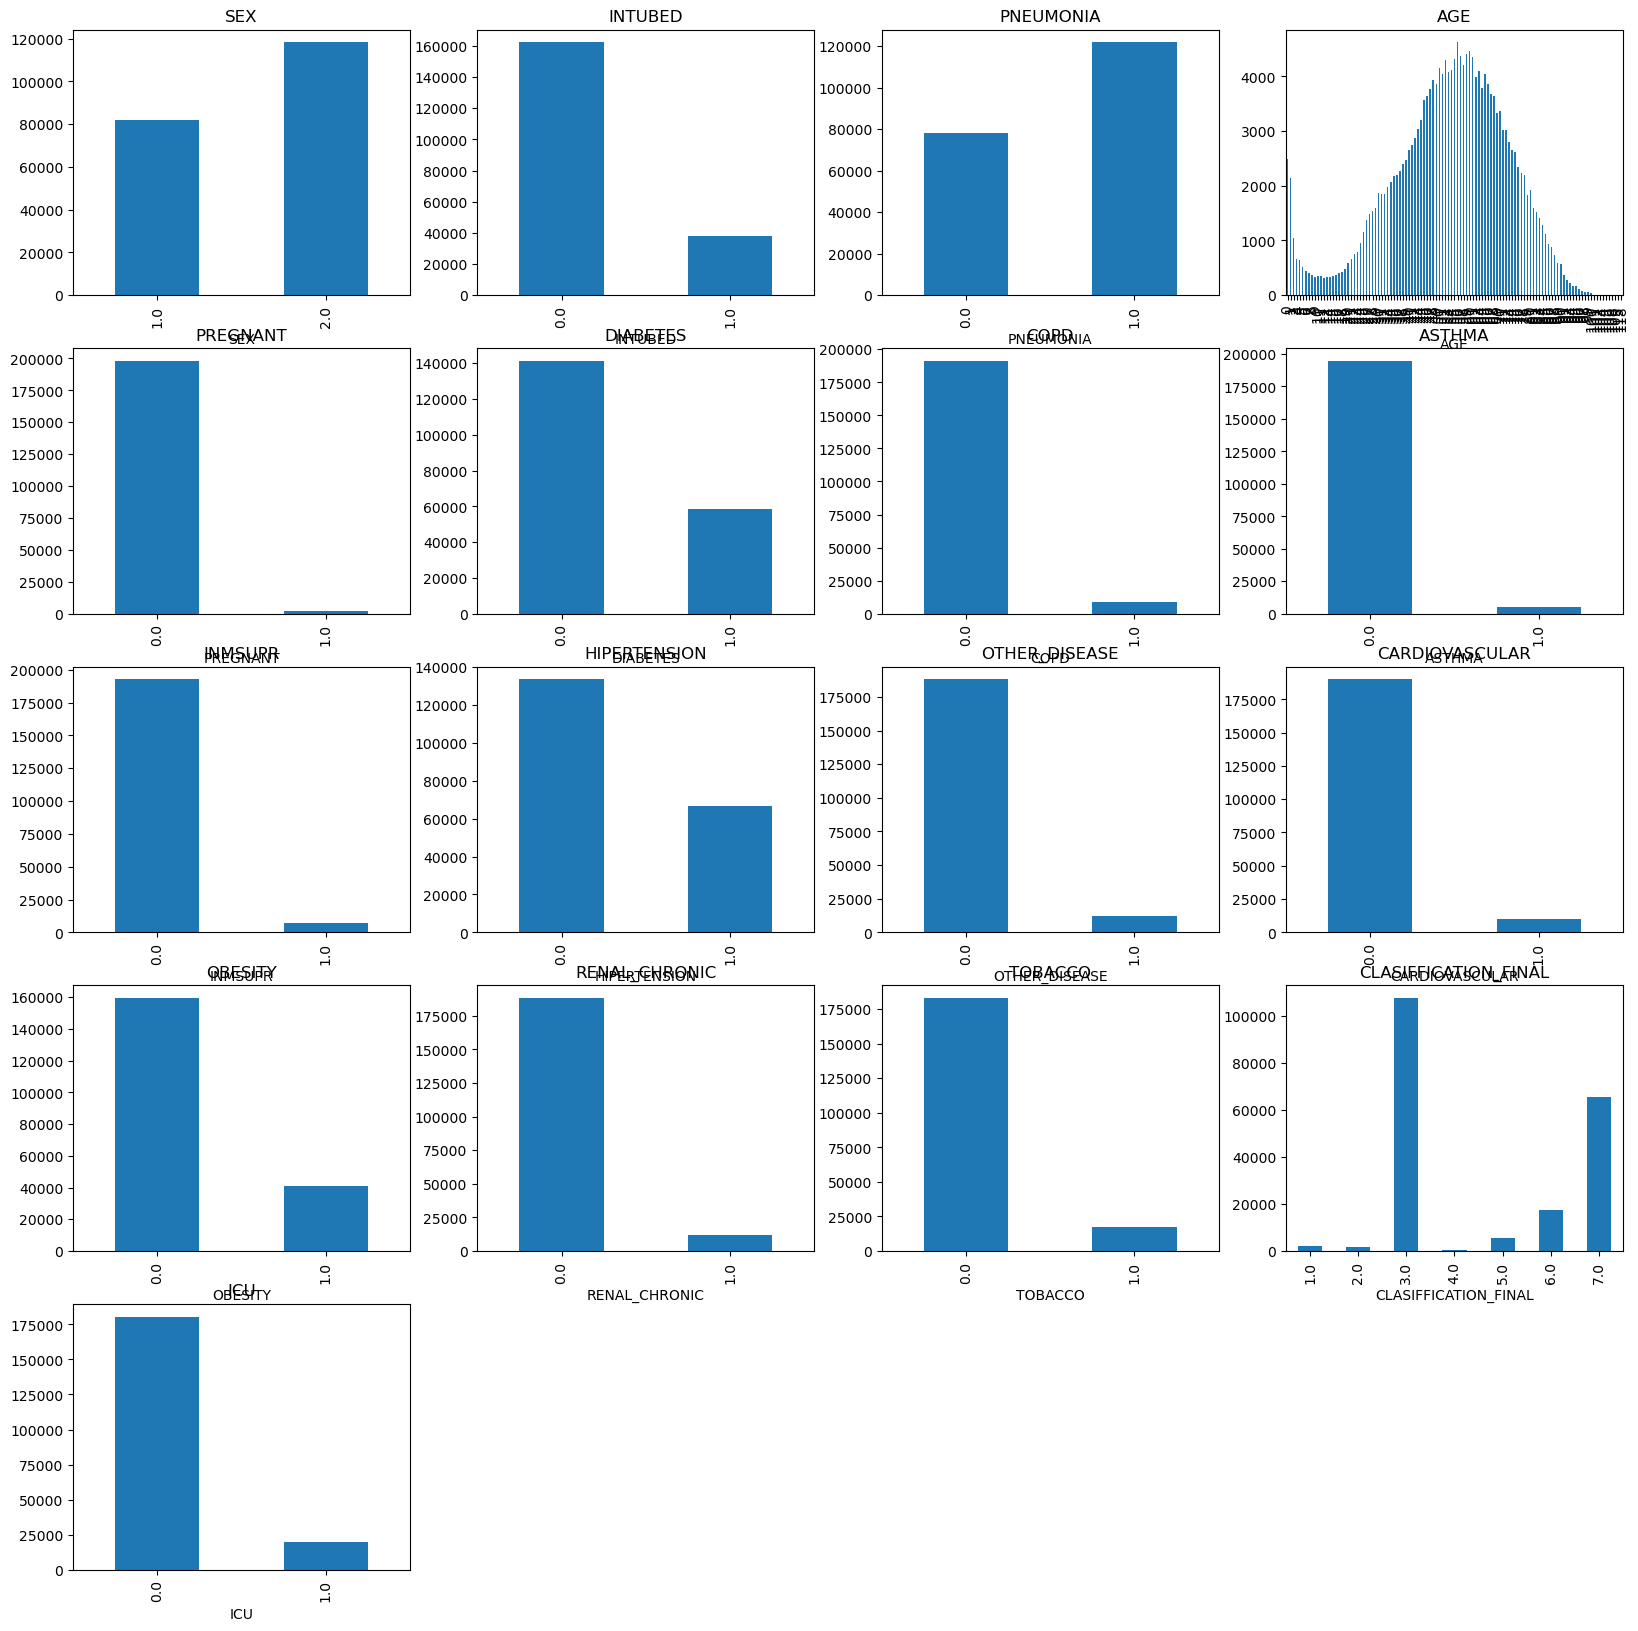

In [9]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df_main, columns=new_column_list, figsize=(20, 20))

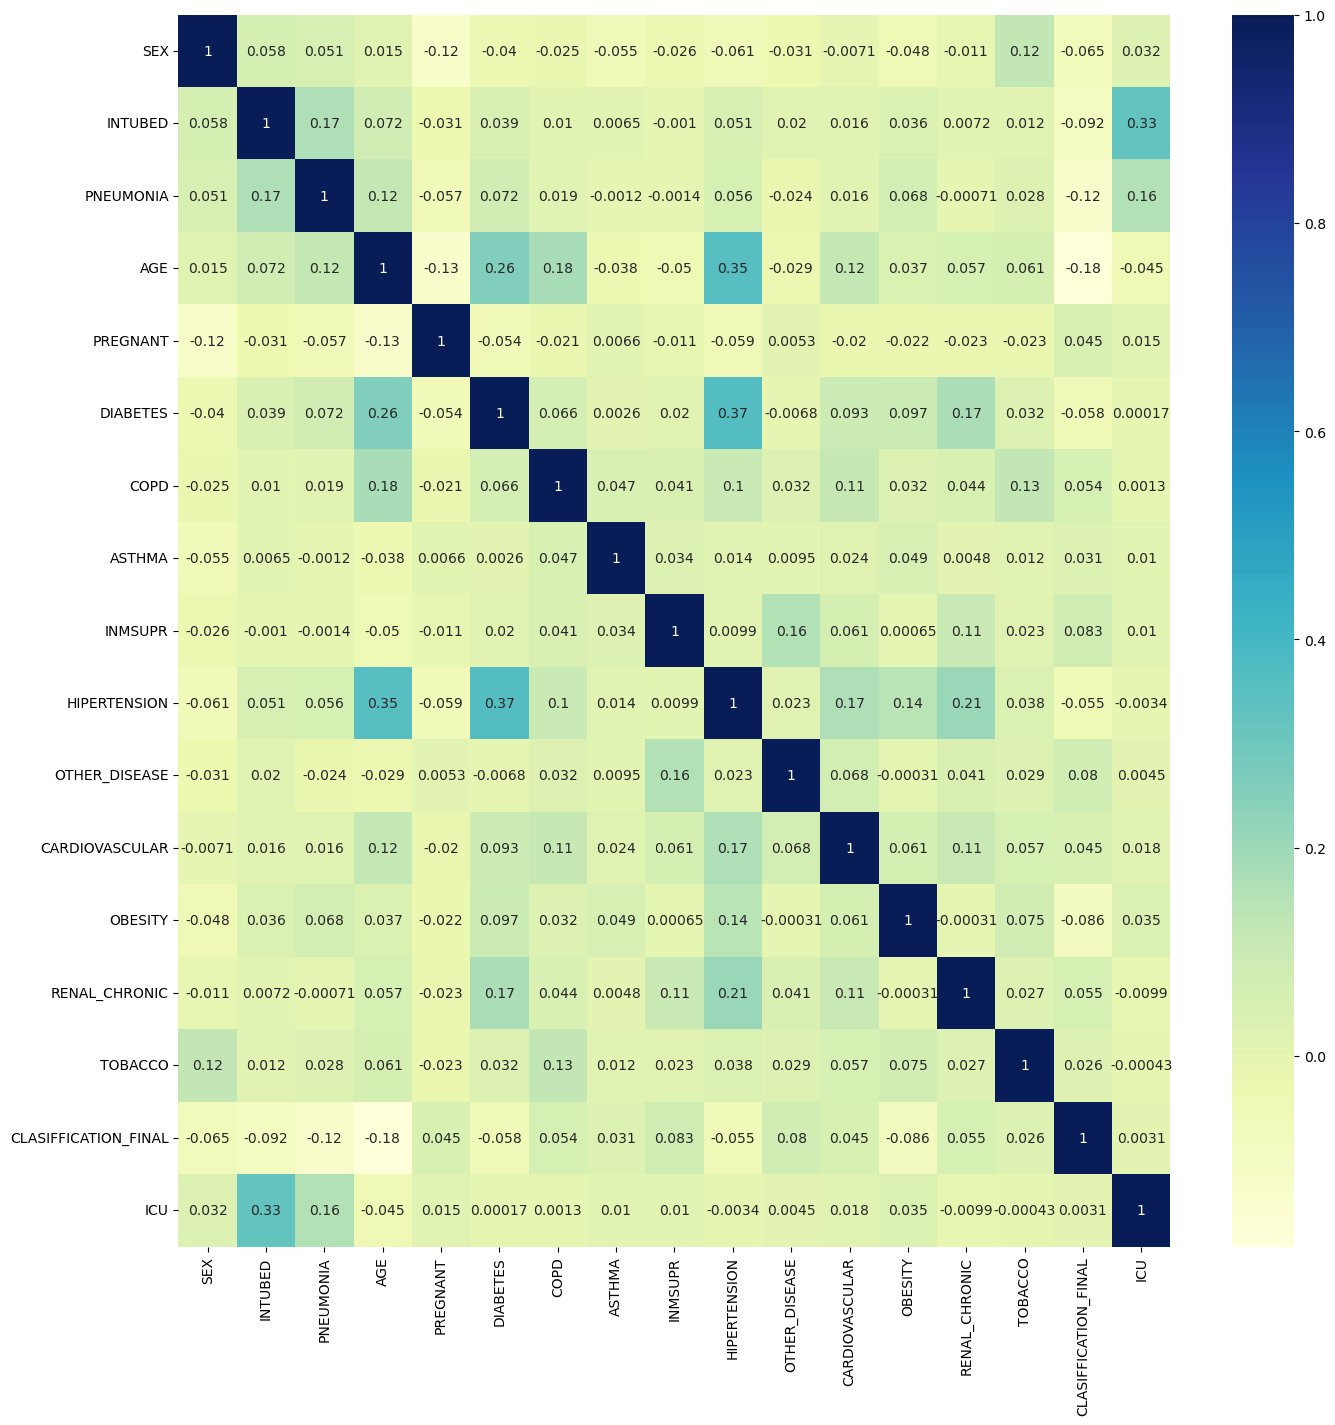

In [10]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df_main.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

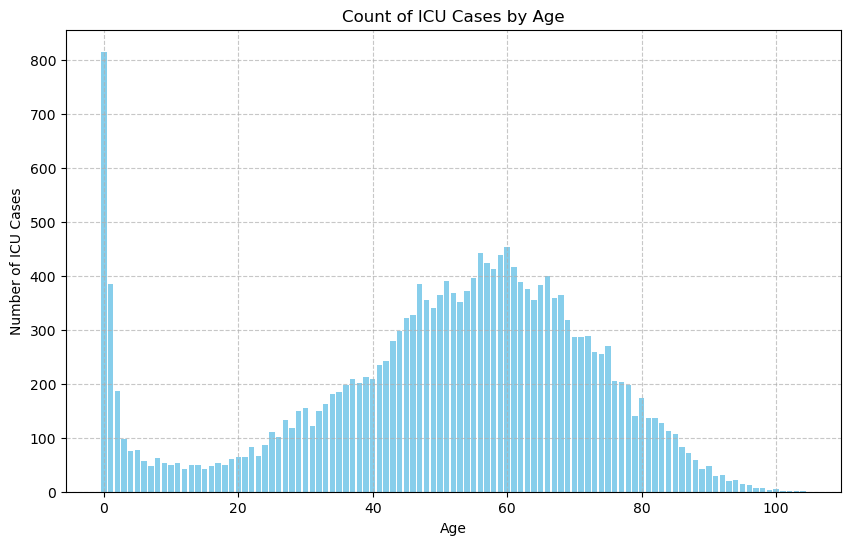

In [11]:
icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [12]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Discretize features into bins (e.g., 5 bins)
y = analytics_df_main['ICU']
X = analytics_df_main.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df = analytics_df_main.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)


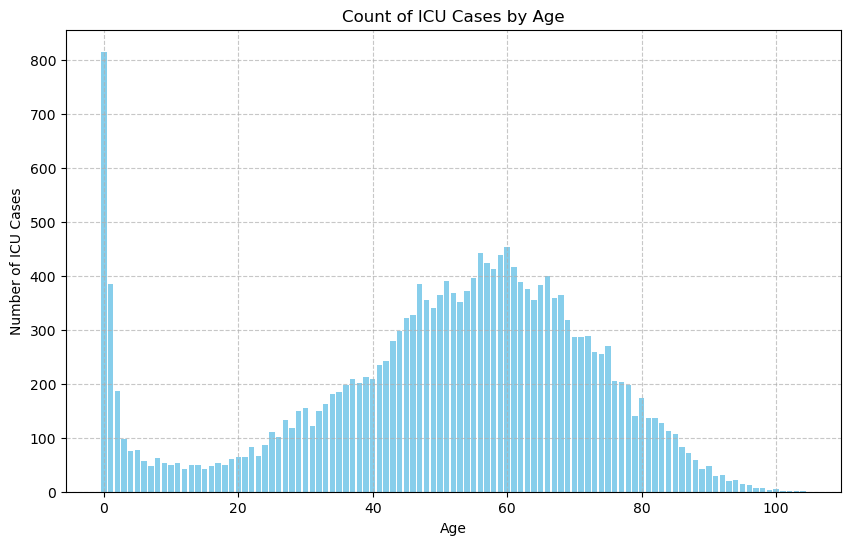

In [13]:
analytics_df = md.cleanDataForModeling(analytics_df)

icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [14]:
from collections import Counter

analytics_df = md.cleanDataForModeling(analytics_df)
occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.326269
PNEUMONIA         0.155660
OBESITY           0.035380
SEX               0.032110
CARDIOVASCULAR    0.017832
PREGNANT          0.015103
INMSUPR           0.010256
ASTHMA            0.010072
OTHER_DISEASE     0.004523
COPD              0.001298
DIABETES          0.000168
TOBACCO          -0.000426
HIPERTENSION     -0.003412
RENAL_CHRONIC    -0.009862
AGE              -0.044928
dtype: float64
Top 6 features: ['INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
INTUBED           0.044265
PNEUMONIA         0.043924
SEX               0.031373
HIPERTENSION      0.012108
DIABETES          0.009539
OBESITY           0.005083
AGE               0.003739
COPD              0.001395
RENAL_CHRONIC     0.001363
OTHER_DISEASE     0.001269
CARDIOVASCULAR    0.000426
INMSUPR           0.000070
PREGNANT          

### Logistic Regression Model

#### 1. 5 chosen features: 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX'

X_train shape: (140021, 5)
X_test shape: (60010, 5)
y_train shape: (140021,)
y_test shape: (60010,)
X_train shape after applying SMOTE: (252730, 5)
y_train shape after applying SMOTE: (252730,)
--------------------------------------------------
X_train shape: (140021, 5)
X_test shape: (60010, 5)
y_train shape: (140021,)
y_test shape: (60010,)
X_train shape after applying NearMiss (27312, 5)
y_train shape after applying NearMiss: (27312,)


<Axes: title={'center': 'ICU'}, xlabel='ICU'>

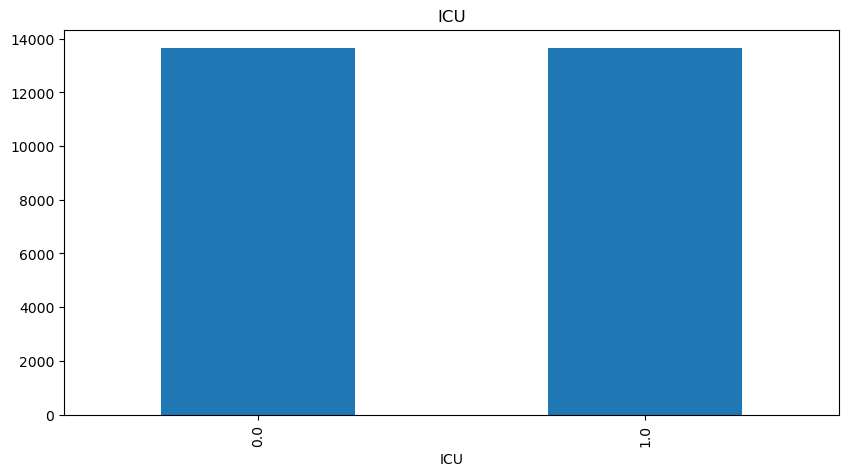

In [25]:
# 5 chosen features: 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX'
analytics_df = analytics_df_main[['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ASTHMA','ICU']]

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)
y_under_train.value_counts(dropna=False).sort_index().plot(kind='bar', title='ICU', figsize=(10, 5))

##### Apply Logistic Regression model to original dataset


Model: Logistic Regression
Training Accuracy: 0.9049785389334457
Test Accuracy: 0.9044659223462757

Cross-Validation Accuracy Scores: [0.90505267 0.90501357 0.90476361 0.90476361 0.90540637]
Mean CV Accuracy Score: 0.9049999639146609
Standard Deviation of CV Scores: 0.0002365840939542017
ROC AUC Score: 0.7652702147963032


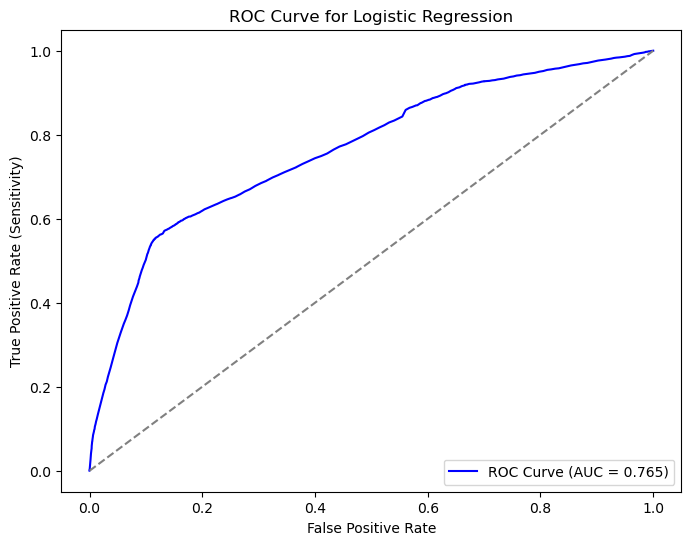

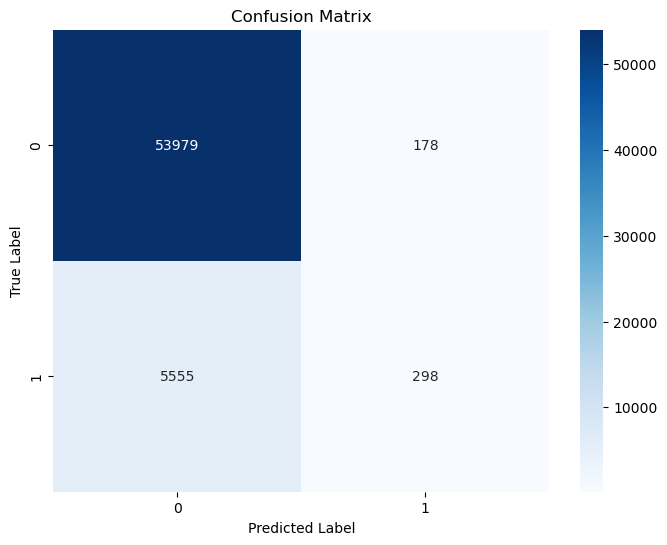


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     54157
         1.0       0.63      0.05      0.09      5853

    accuracy                           0.90     60010
   macro avg       0.77      0.52      0.52     60010
weighted avg       0.88      0.90      0.87     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.6260504201680672
Recall: 0.05091406116521442
F1-Score: 0.09416969505451098
ROC AUC Score: 0.7652702147963032


LogisticRegression(max_iter=2000, random_state=42, solver='newton-cholesky')

In [ ]:
md.logistic_regression_model(training_set={'X': X_train, 'Y': y_train} , test_set={'X': X_test, 'Y': y_test}, solver='liblinear', class_weight=None) #

##### Apply Logistic Regression model to oversampling dataset


Model: Logistic Regression
Training Accuracy: 0.7188580698769438
Test Accuracy: 0.8070654890851525

Cross-Validation Accuracy Scores: [0.71958216 0.71821707 0.72106596 0.71782139 0.71732679]
Mean CV Accuracy Score: 0.7188026747912792
Standard Deviation of CV Scores: 0.0013575083303022579
ROC AUC Score: 0.764940724934041


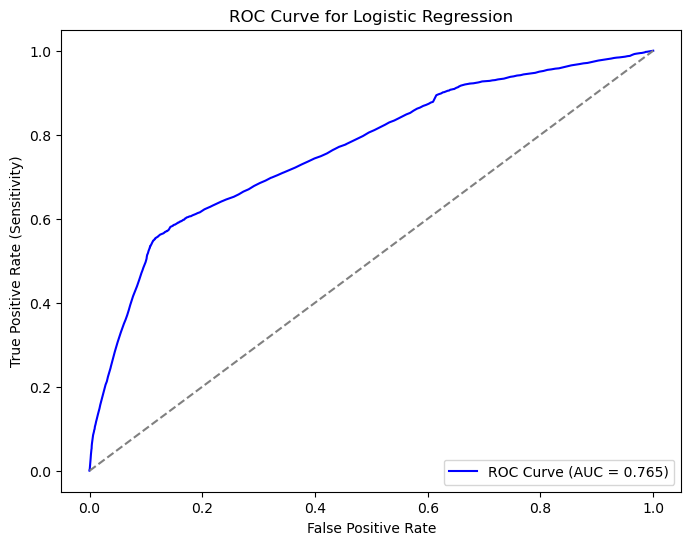

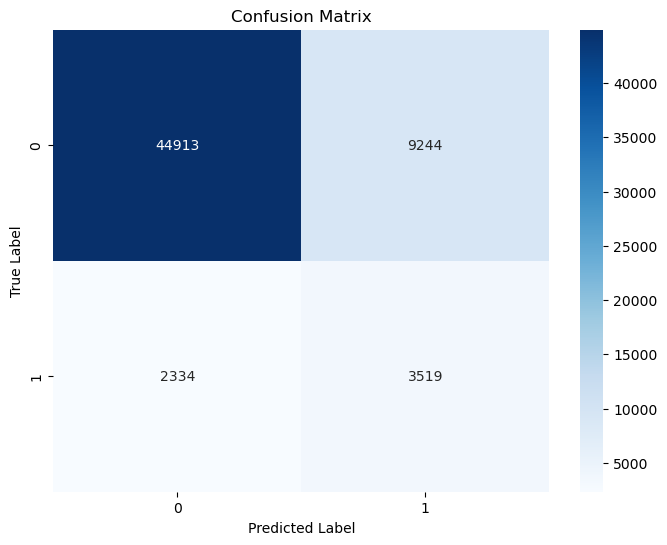


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89     54157
         1.0       0.28      0.60      0.38      5853

    accuracy                           0.81     60010
   macro avg       0.61      0.72      0.63     60010
weighted avg       0.88      0.81      0.84     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.2757188748726788
Recall: 0.6012301383905689
F1-Score: 0.3780618822518264
ROC AUC Score: 0.764940724934041


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [17]:
md.logistic_regression_model(training_set={'X': X_over_train, 'Y': y_over_train}
                       , test_set={'X': X_over_test, 'Y': y_over_test}
                       , solver='liblinear', class_weight=None)

##### Apply Logistic Regression model to undersampling dataset


Model: Logistic Regression
Training Accuracy: 0.7210017574692443
Test Accuracy: 0.7873021163139476

Cross-Validation Accuracy Scores: [0.71737141 0.71792056 0.72262907 0.72006591 0.72647382]
Mean CV Accuracy Score: 0.7208921533517347
Standard Deviation of CV Scores: 0.003349047659831022
ROC AUC Score: 0.7621756878547273


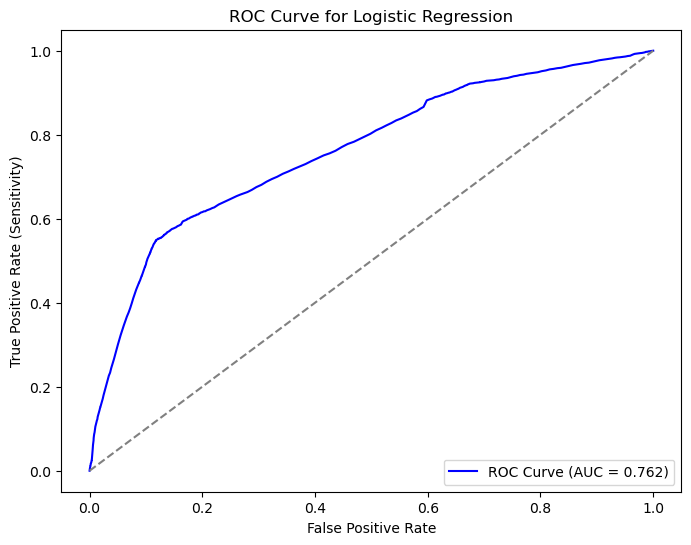

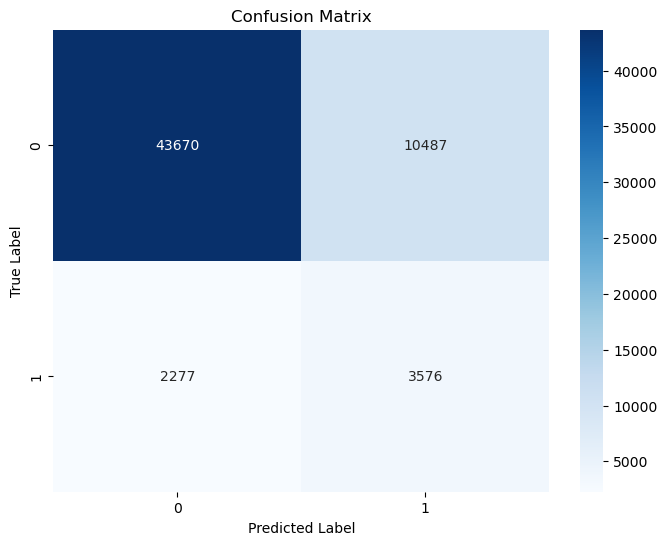


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     54157
         1.0       0.25      0.61      0.36      5853

    accuracy                           0.79     60010
   macro avg       0.60      0.71      0.62     60010
weighted avg       0.88      0.79      0.82     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.2542842921140582
Recall: 0.610968733982573
F1-Score: 0.3591082546696124
ROC AUC Score: 0.7621756878547273


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [18]:
md.logistic_regression_model(training_set={'X': X_under_train, 'Y': y_under_train} 
                       , test_set={'X': X_under_test, 'Y': y_under_test}
                       , solver='liblinear', class_weight=None)

#### 2. 5 chosen features: 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR'

In [19]:
# 5 chosen features: 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR'
analytics_df = analytics_df_main[['PNEUMONIA', 'AGE', 'PREGNANT', 'ASTHMA', 'OTHER_DISEASE','ICU']]

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)

X_train shape: (140021, 5)
X_test shape: (60010, 5)
y_train shape: (140021,)
y_test shape: (60010,)
X_train shape after applying SMOTE: (252730, 5)
y_train shape after applying SMOTE: (252730,)
--------------------------------------------------
X_train shape: (140021, 5)
X_test shape: (60010, 5)
y_train shape: (140021,)
y_test shape: (60010,)
X_train shape after applying NearMiss (27312, 5)
y_train shape after applying NearMiss: (27312,)


##### Apply Logistic Regression model to original dataset

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


Model: Logistic Regression
Training Accuracy: 0.9024717720913291
Test Accuracy: 0.9024662556240627

Cross-Validation Accuracy Scores: [0.90244599 0.90247822 0.90247822 0.90247822 0.90247822]
Mean CV Accuracy Score: 0.902471772275448
Standard Deviation of CV Scores: 1.2890244133512141e-05
ROC AUC Score: 0.6510093741572541


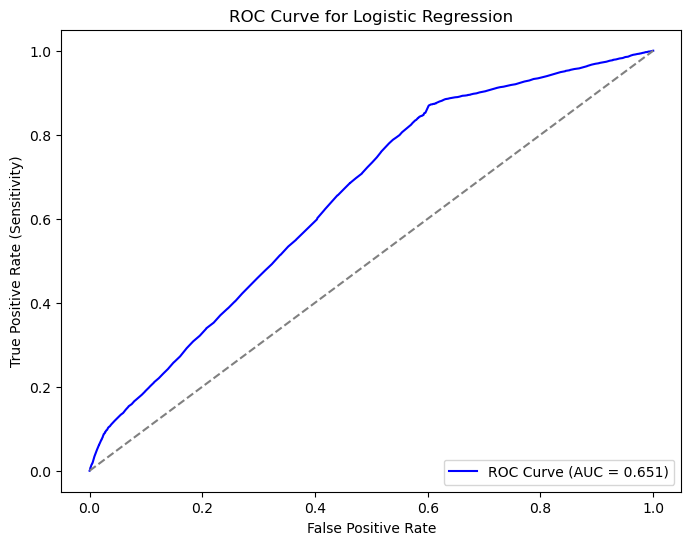

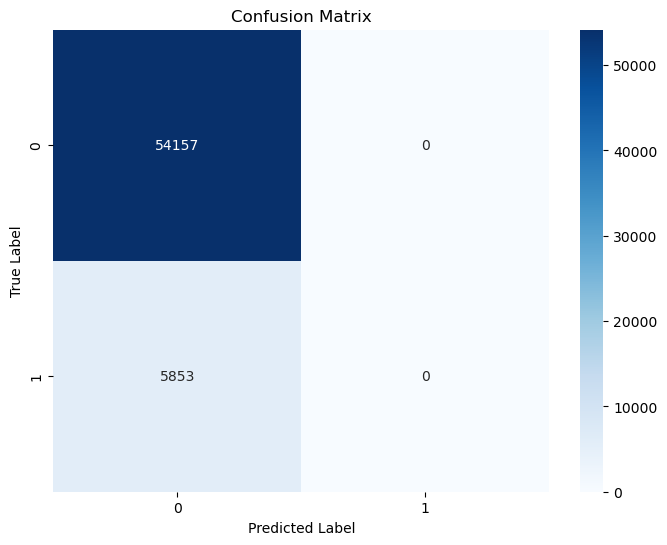


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     54157
         1.0       0.00      0.00      0.00      5853

    accuracy                           0.90     60010
   macro avg       0.45      0.50      0.47     60010
weighted avg       0.81      0.90      0.86     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC Score: 0.6510093741572541


/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [20]:
md.logistic_regression_model(training_set={'X': X_train, 'Y': y_train} , test_set={'X': X_test, 'Y': y_test}, solver='liblinear', class_weight=None) #{0:1, 1:5}

##### Apply Logistic Regression model to oversampling dataset


Model: Logistic Regression
Training Accuracy: 0.6259763383848376
Test Accuracy: 0.4681053157807032

Cross-Validation Accuracy Scores: [0.62849681 0.62727021 0.62422348 0.62626123 0.62299687]
Mean CV Accuracy Score: 0.6258497210461759
Standard Deviation of CV Scores: 0.001998881005954973
ROC AUC Score: 0.65096567436625


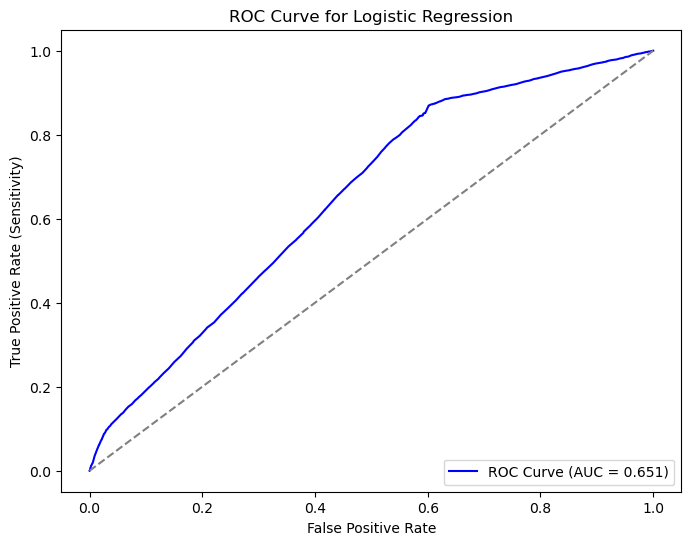

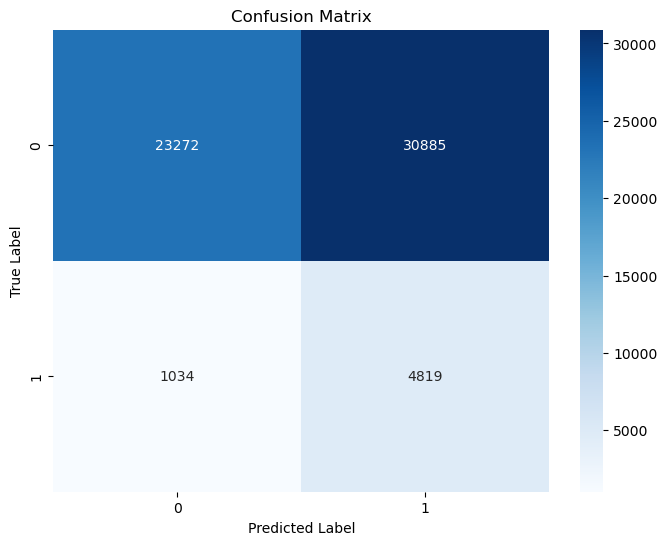


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.43      0.59     54157
         1.0       0.13      0.82      0.23      5853

    accuracy                           0.47     60010
   macro avg       0.55      0.63      0.41     60010
weighted avg       0.88      0.47      0.56     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.13497087161102397
Recall: 0.8233384589099607
F1-Score: 0.23192241980893713
ROC AUC Score: 0.65096567436625


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [21]:
md.logistic_regression_model(training_set={'X': X_over_train, 'Y': y_over_train}
                       , test_set={'X': X_over_test, 'Y': y_over_test}
                       , solver='liblinear', class_weight=None)

##### Apply Logistic Regression model to undersampling dataset


Model: Logistic Regression
Training Accuracy: 0.6172744581136497
Test Accuracy: 0.4786368938510248

Cross-Validation Accuracy Scores: [0.61998902 0.61669412 0.6246796  0.6127792  0.61241304]
Mean CV Accuracy Score: 0.6173109965894861
Standard Deviation of CV Scores: 0.004612502472509725
ROC AUC Score: 0.6487669931402591


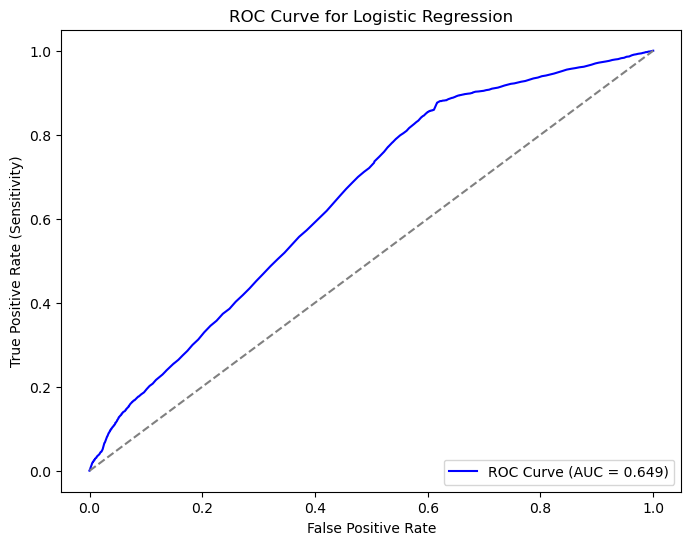

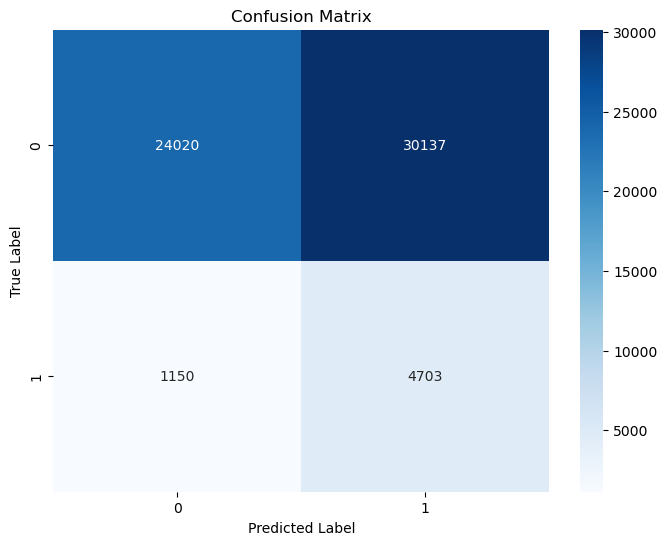


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.44      0.61     54157
         1.0       0.13      0.80      0.23      5853

    accuracy                           0.48     60010
   macro avg       0.54      0.62      0.42     60010
weighted avg       0.87      0.48      0.57     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.13498851894374284
Recall: 0.8035195626174612
F1-Score: 0.23114540584375692
ROC AUC Score: 0.6487669931402591


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [22]:
md.logistic_regression_model(training_set={'X': X_under_train, 'Y': y_under_train} 
                       , test_set={'X': X_under_test, 'Y': y_under_test}
                       , solver='liblinear', class_weight=None)